In [433]:
with open("../phenopairs.pkl", "rb") as f: phenopairs = pickle.load(f)

In [13]:
seqssoftextreme1=np.load("../seqssoftextreme1(1).npy")

In [14]:
seqssoftextreme1

array('AUCGGCCGGGCC', dtype='<U12')

In [15]:
prob_1_softextreme_1=np.load("../prob_1_softextreme_1.npy")

In [16]:
prob_1_softextreme_0 = np.load("../prob_0_softextreme_1.npy")

In [17]:
(prob_1_softextreme_0, prob_1_softextreme_1)

(array(0.00115323), array(0.89332251))

In [434]:
phenopairs[130]

('.((....))...', '...(((...)))')

In [437]:
neutralsets['...(((...)))']

60845.5790211311

In [7]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

for mu in [0.01,0.001,0.0001]:
    for gap in [5,10,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        column_mean = defaultdict(list)
        for column_name in column_names:
            
            csv_files = glob.glob(directory_path + '*.csv')

            dfs = []

            for file in csv_files:
                df = pd.read_csv(file)
                dfs.append(df[column_name])

            concatenated_df = pd.concat(dfs, axis=1)
            for i in range(0,10000):
                column_mean[column_name].append(concatenated_df.iloc[i].mean())
            
        dfmean = pd.DataFrame(column_mean)
        dfmean.to_csv(directory_path+'meandata.csv')

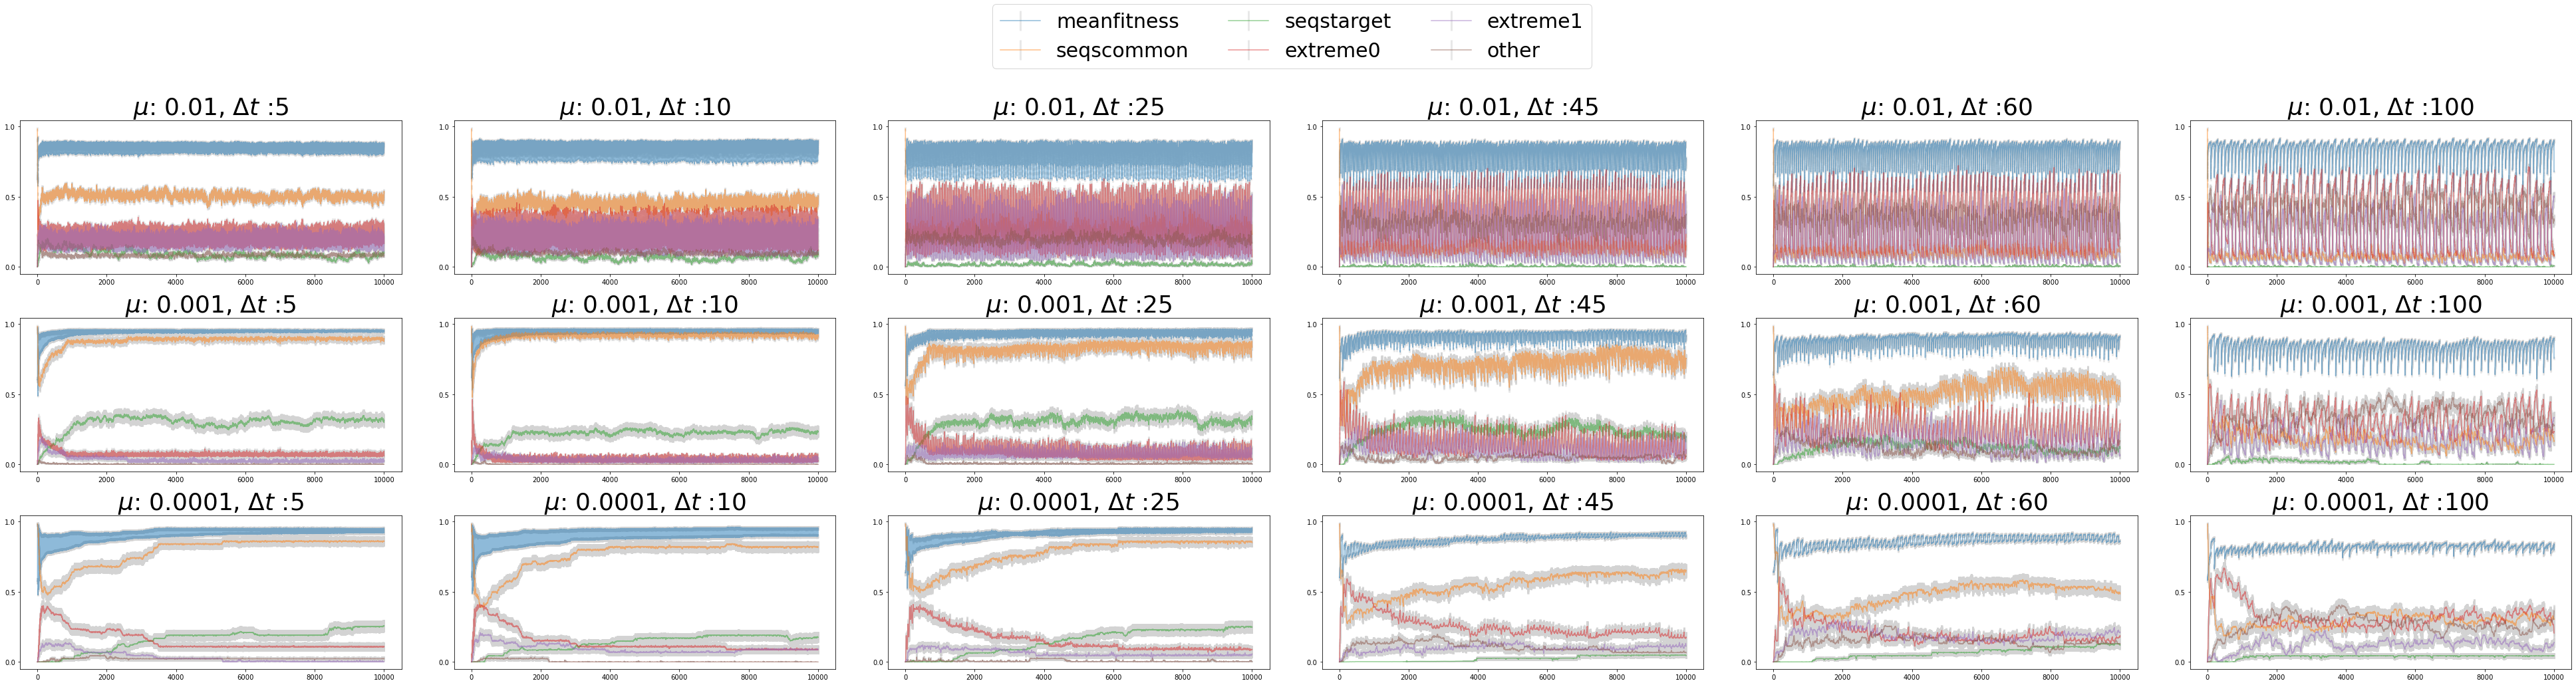

In [2]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')
        dfstd = pd.read_csv(directory_path + 'stddata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].errorbar(np.arange(1,10001), df[column_name][0:10000], yerr=dfstd[column_name][0:10000]/np.sqrt(100.), ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.5, label=column_name)

            #ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn.png',bbox_inches='tight')

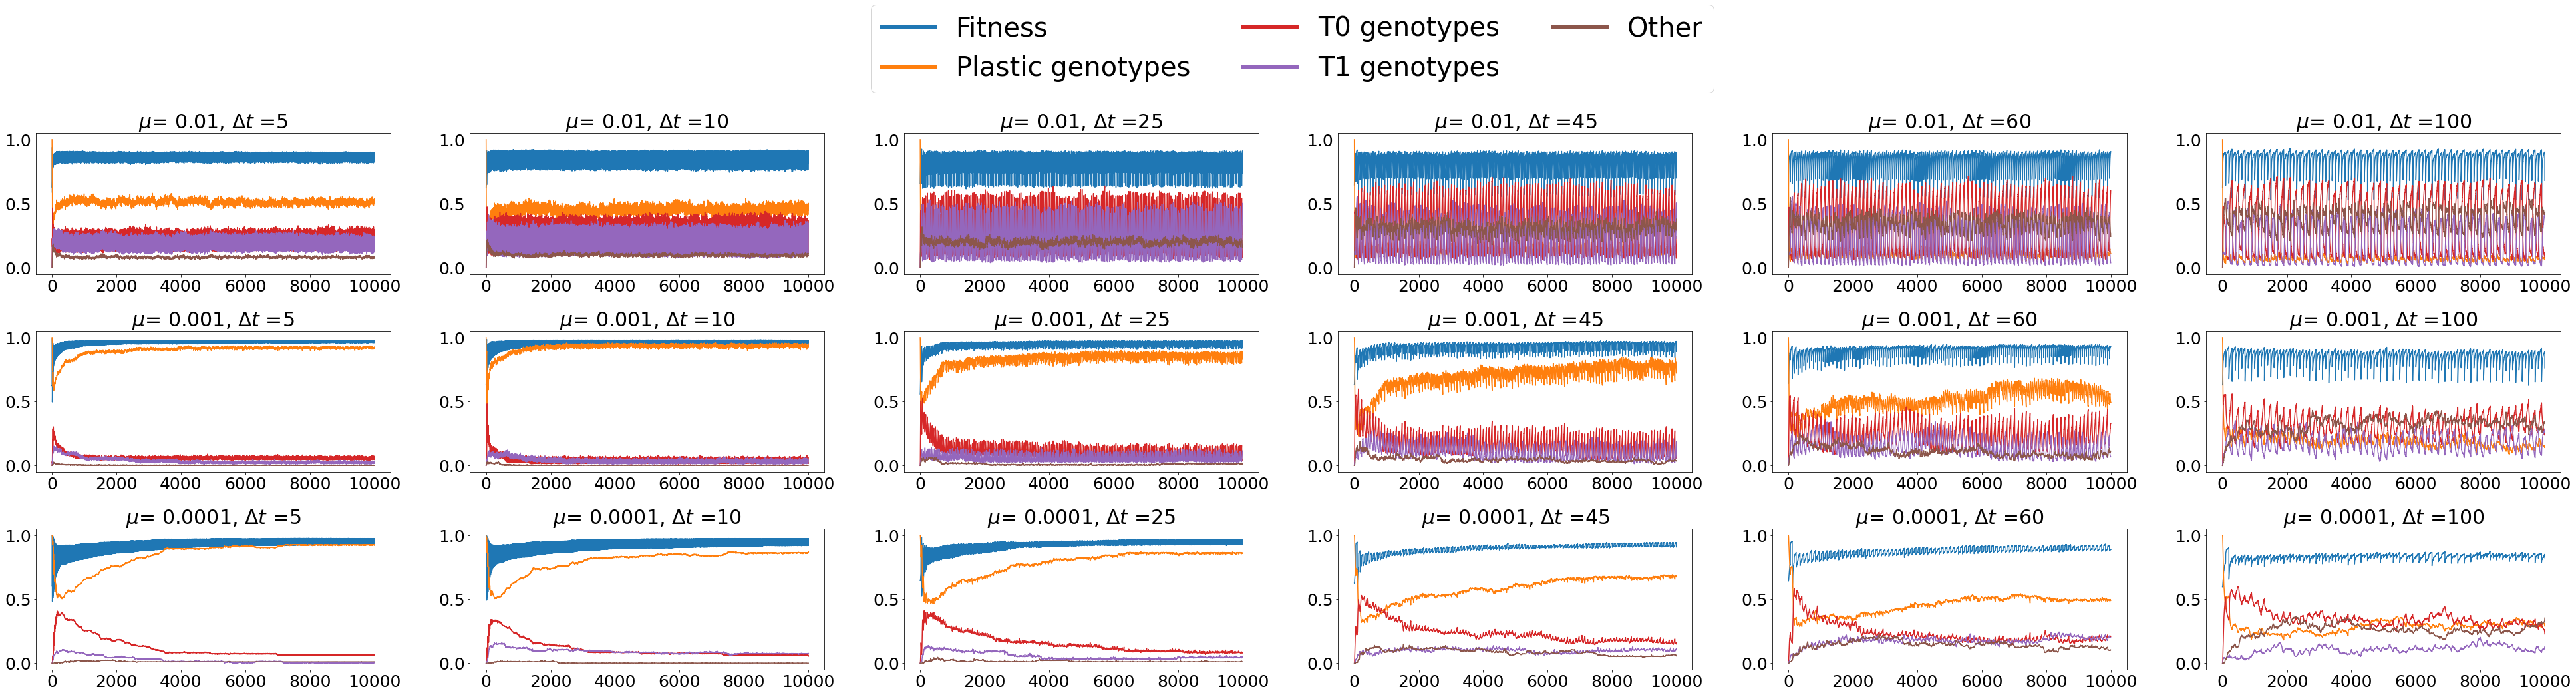

In [105]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/Figure2_timeseries_targetpair_example/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')
        dfstd = pd.read_csv(directory_path + 'stddata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        legend_names = {'meanfitness': 'Fitness', 'seqscommon': 'Plastic genotypes', 'seqstarget': 'Balanced-plastic genotypes', 'extreme0': 'T0 genotypes', 'extreme1':r'T1 genotypes', 'other': 'Other'}
        
        for column_name in column_names:
            if column_name == 'seqstarget': continue
            #ax[countrow,countcol].errorbar(np.arange(1,10001), df[column_name][0:10000], yerr=dfstd[column_name][0:10000]/np.sqrt(100.), ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.5, label=legend_names[column_name])
            ax[countrow,countcol].tick_params(axis='both', labelsize=25)
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=legend_names[column_name], color = color[column_names.index(column_name)])
            ax[countrow,countcol].set_title(r'$\mu$= ' + str(mu) + r', $\Delta t$ =' + str(gap), fontsize = 30)
            #ax[countrow,countcol].set_xlabel('Generations', fontsize = 30)

handles, labels = ax[2,5].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0, 0.17, 1, 1), ncol=3, bbox_transform=plt.gcf().transFigure, fontsize=40)

# Set the edgecolor and linewidth of the legend
for handle in legend.legendHandles:
    handle.set_linewidth(7.0)
#fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.17, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure, fontsize = 40)
#fig.savefig('seqsevodyn.png',bbox_inches='tight')
fig.savefig('seqsevodyn_test.png',bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')
        dfstd = pd.read_csv(directory_path + 'stddata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].errorbar(np.arange(1,10001), df[column_name][0:10000], yerr=dfstd[column_name][0:10000]/np.sqrt(100.), ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.5, label=column_name)

            #ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn.png',bbox_inches='tight')

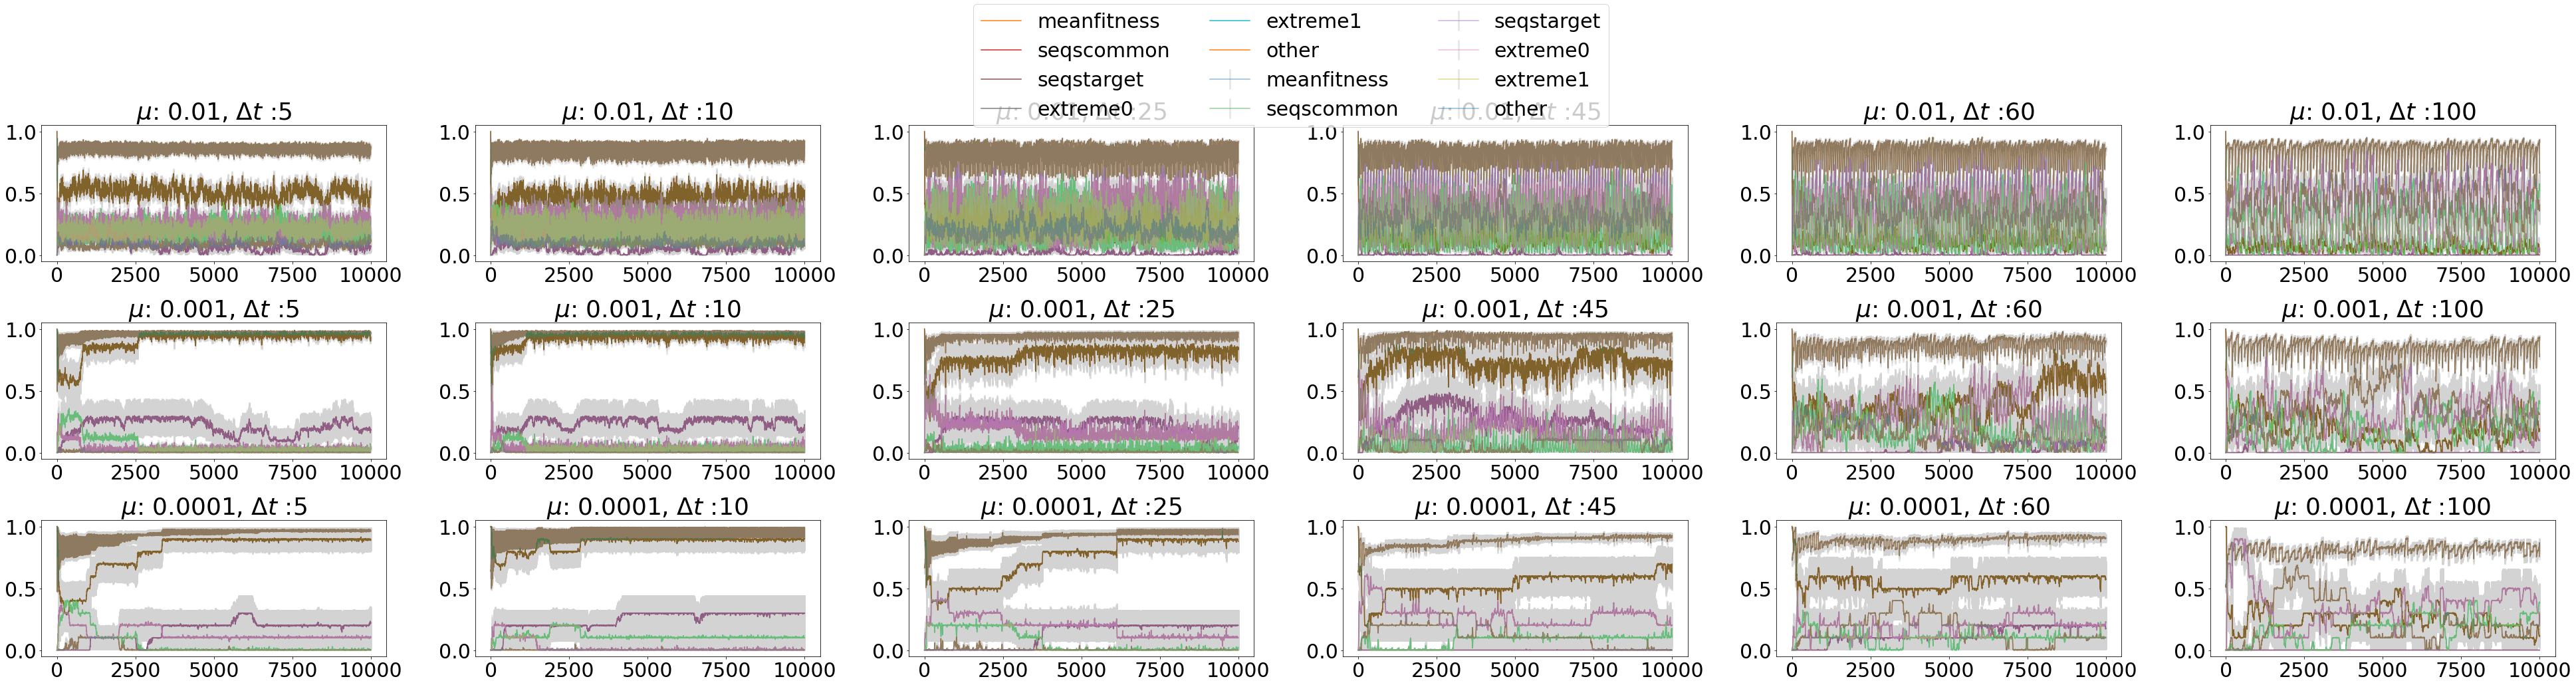

In [67]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')
        dfstd = pd.read_csv(directory_path + 'stddata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].errorbar(np.arange(1,10001), df[column_name][0:10000], yerr=dfstd[column_name][0:10000]/np.sqrt(10.), ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.5, label=column_name)

            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn.png',bbox_inches='tight')

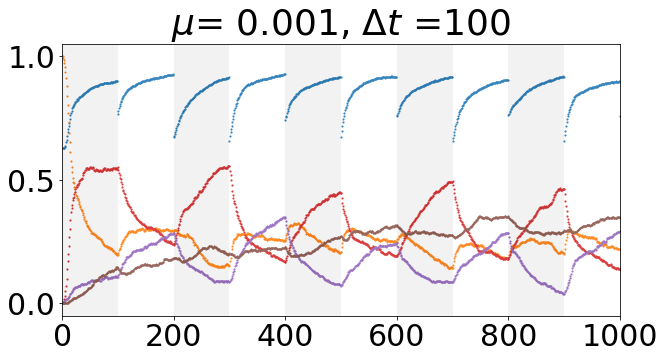

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

fig, ax = plt.subplots(figsize=(10, 5))
gap = 100
mu = 0.001
rangex_value = 1000  # Renamed rangex to avoid conflict
directory_path = os.path.join('..', 'data', f'fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap{gap}_mu{mu}_generations10000_Npop100')
df = pd.read_csv(os.path.join(directory_path, 'meandata.csv'))

column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, column_name in enumerate(column_names):
        if column_name == 'seqstarget': continue
        ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], s = 5, marker='.',  label=column_name, color=color[i])

#for i in range(0, rangex_value, gap*2):
#        ax.axvline(x=i, color='red', linestyle='-')

#for i in range(gap, rangex_value, gap*2):
#        ax.axvline(x=i, color='purple', linestyle='-')
light_red = (1, 0, 0, 0.01)  # RGB color code for light red
for i in range(0, rangex_value, gap*2):
    #ax.axvline(x=i, color='red', linestyle='-')
    if i + gap < rangex_value:
        ax.axvspan(i, i + gap, facecolor='grey', alpha=0.1)

for i in range(gap, rangex_value, gap*2):
    #ax.axvline(x=i, color='purple', linestyle='-')
    if i + gap < rangex_value:
        ax.axvspan(i, i + gap, facecolor='white', alpha=0.1)

ax.axvspan(i, rangex_value, facecolor='white', alpha=0.1)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Concatenate mu and gap into the title using f-string
title = f'$\mu$= {mu}, $\Delta t$ ={gap}'
ax.set_title(title)
ax.set_xlim(0, rangex_value)
# Add legend
#fig.legend(loc='lower center', bbox_to_anchor=(0, -0.4, 1, 1), ncol=1, bbox_transform=plt.gcf().transFigure)

# Save the plot
fig.savefig('seqsevodyn-closeup100.png', bbox_inches='tight')


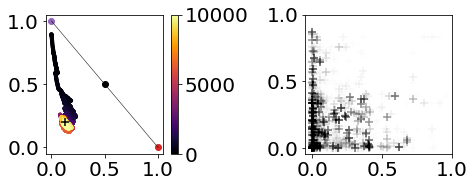

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

# Set parameters for the single figure
fig, axs = plt.subplots(1, 2, figsize=(7, 3.))  # Create a figure with 2 subplots

gap = 100.0
mu = 0.001
extremeoption = 0  # Example: Choose one option to display
N = 10000
extremeoption = 1
plt.rcParams.update({'font.size':20})
# Load data for the single scenario
data = pd.read_csv(f'../meanprobsalphadata_fitlands2_initoption0_extremeoption{extremeoption}_samplenum10_plasticoption0_gengap{gap}_mu{mu}_generations10000_Npop100(1).csv')

# Calculate the current color
colors = np.arange(N)
list_meanprobs0= list(data['meanprobs0'])
list_meanprobs1= list(data['meanprobs1'])
list_alpha = list(data['alphalist'])
# Additional plot decorations
axs[0].scatter([0.5], [0.5], color='black', marker='o')
axs[0].scatter([1.0], [0.0], color='#d62728', marker='o')
axs[0].scatter([0.0], [1.0], color='#9467bd', marker='o')
axs[0].set_xticks([0, 0.5, 1.0])
axs[0].set_yticks([0.0, 0.5, 1.0])
#axs[0].set_title(r"$\mu$=" + str(mu) + r", $\Delta t=$" + str(gap), fontsize=12)
axs[0].plot([1.0, 0.0], [0.0, 1.0], 'k-', lw=0.5)  # Black line from (1.0, 0.0) to (0.0, 1.0)

# Inside the loop, after calculating list_meanprobs0 and list_meanprobs1
first_point = (list_meanprobs0[0], list_meanprobs1[0])
last_point = (list_meanprobs0[-1], list_meanprobs1[-1])
target_point = (0.5, 0.5)

# Calculate Euclidean distance from the first point to (0.5, 0.5)
distance_first_to_target = np.sqrt((first_point[0] - target_point[0])**2 + (first_point[1] - target_point[1])**2)/(np.sqrt(2)/2)

# Calculate Euclidean distance from the last point to (0.5, 0.5)
distance_last_to_target = np.sqrt((last_point[0] - target_point[0])**2 + (last_point[1] - target_point[1])**2)/(np.sqrt(2)/2)
#plasticity_increase = np.round(100*(distance_first_to_target - distance_last_to_target)/distance_first_to_target, 2)
plasticity_increase = np.round(distance_last_to_target,2)
sc = axs[0].scatter(data['meanprobs0'], data['meanprobs1'], s=10, alpha=1, c=colors, cmap='inferno')
#plt.scatter(list_meanprobs0[0], list_meanprobs1[0], s=50, c='#9467bd', marker='.',label = plasticity_increase)#label= str(np.round(plasticity_increase,0))+ '%')
axs[0].scatter(list_meanprobs0[-1], list_meanprobs1[-1], s=50, c='k', marker='+', label = r'$d= $'+str(plasticity_increase))

# Create a ScalarMappable instance with the colormap and the color range for the colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=0, vmax=N))
fig.colorbar(sm, ax=axs[0])  # Add colorbar to the figure
#axs[0].set_xlabel(r'$\bar{P}_0$')
#axs[0].set_ylabel(r'$\bar{P}_1$')
#axs[0].legend(fontsize='12')

axs[1].scatter(probstarg0_1_100_001, probstarg1_1_100_001,alpha=0.01,s = 50,marker = '+', color='k') #color='#9467bd')

#axs[2].scatter(np.arange(N),list_alpha)
#axs[1].set_xlabel(r'$\bar{P}_0$')
#axs[1].set_ylabel(r'$\bar{P}_1$')
axs[1].set_xticks([0,0.5,1.0])
axs[1].set_yticks([0,0.5,1.0])
plt.tight_layout()
plt.savefig('../plasticity_single_100.png', bbox_inches='tight')
plt.show()

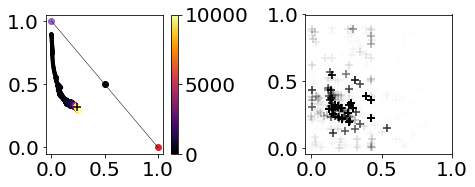

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

# Set parameters for the single figure
fig, axs = plt.subplots(1, 2, figsize=(7, 3.))  # Create a figure with 2 subplots

gap = 25.0
mu = 0.001
extremeoption = 0  # Example: Choose one option to display
N = 10000
extremeoption = 1
plt.rcParams.update({'font.size':20})
# Load data for the single scenario
data = pd.read_csv(f'../meanprobsalphadata_fitlands2_initoption0_extremeoption{extremeoption}_samplenum10_plasticoption0_gengap{gap}_mu{mu}_generations10000_Npop100(1).csv')

# Calculate the current color
colors = np.arange(N)
list_meanprobs0= list(data['meanprobs0'])
list_meanprobs1= list(data['meanprobs1'])
list_alpha = list(data['alphalist'])
# Additional plot decorations
axs[0].scatter([0.5], [0.5], color='black', marker='o')
axs[0].scatter([1.0], [0.0], color='#d62728', marker='o')
axs[0].scatter([0.0], [1.0], color='#9467bd', marker='o')
axs[0].set_xticks([0, 0.5, 1.0])
axs[0].set_yticks([0.0, 0.5, 1.0])
#axs[0].set_title(r"$\mu$=" + str(mu) + r", $\Delta t=$" + str(gap), fontsize=12)
axs[0].plot([1.0, 0.0], [0.0, 1.0], 'k-', lw=0.5)  # Black line from (1.0, 0.0) to (0.0, 1.0)

# Inside the loop, after calculating list_meanprobs0 and list_meanprobs1
first_point = (list_meanprobs0[0], list_meanprobs1[0])
last_point = (list_meanprobs0[-1], list_meanprobs1[-1])
target_point = (0.5, 0.5)

# Calculate Euclidean distance from the first point to (0.5, 0.5)
distance_first_to_target = np.sqrt((first_point[0] - target_point[0])**2 + (first_point[1] - target_point[1])**2)/(np.sqrt(2)/2)

# Calculate Euclidean distance from the last point to (0.5, 0.5)
distance_last_to_target = np.sqrt((last_point[0] - target_point[0])**2 + (last_point[1] - target_point[1])**2)/(np.sqrt(2)/2)
#plasticity_increase = np.round(100*(distance_first_to_target - distance_last_to_target)/distance_first_to_target, 2)
plasticity_increase = np.round(distance_last_to_target,2)
sc = axs[0].scatter(data['meanprobs0'], data['meanprobs1'], s=10, alpha=1, c=colors, cmap='inferno')
#plt.scatter(list_meanprobs0[0], list_meanprobs1[0], s=50, c='#9467bd', marker='.',label = plasticity_increase)#label= str(np.round(plasticity_increase,0))+ '%')
axs[0].scatter(list_meanprobs0[-1], list_meanprobs1[-1], s=50, c='k', marker='+', label = r'$d= $'+str(plasticity_increase))

# Create a ScalarMappable instance with the colormap and the color range for the colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=0, vmax=N))
fig.colorbar(sm, ax=axs[0])  # Add colorbar to the figure
#axs[0].set_xlabel(r'$\bar{P}_0$')
#axs[0].set_ylabel(r'$\bar{P}_1$')
#axs[0].legend(fontsize='12')

axs[1].scatter(probstarg0_1_25_001, probstarg1_1_25_001,alpha=0.01,s = 50,marker = '+', color='k') #color='#9467bd')

#axs[2].scatter(np.arange(N),list_alpha)
#axs[1].set_xlabel(r'$\bar{P}_0$')
#axs[1].set_ylabel(r'$\bar{P}_1$')
axs[1].set_xticks([0,0.5,1.0])
axs[1].set_yticks([0,0.5,1.0])
plt.tight_layout()
plt.savefig('../plasticity_single_25.png', bbox_inches='tight')

In [131]:
probstarg0 = np.load('../probstarg0.npy')
probstarg1 = np.load('../probstarg1.npy')

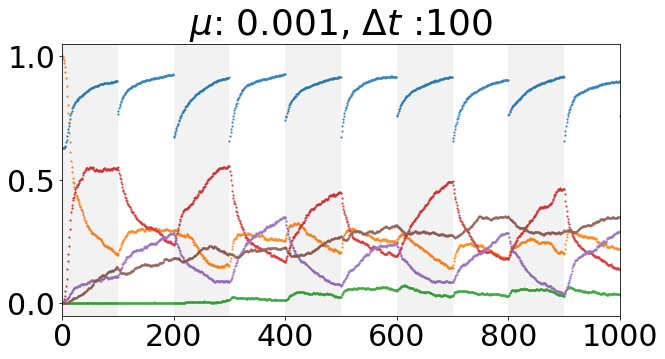

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

fig, ax = plt.subplots(figsize=(10, 5))
gap = 100
mu = 0.001
rangex_value = 1000  # Renamed rangex to avoid conflict
directory_path = os.path.join('..', 'data', f'fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap{gap}_mu{mu}_generations10000_Npop100')
df = pd.read_csv(os.path.join(directory_path, 'meandata.csv'))

column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
color = ['blue', 'orange', 'green', 'purple', 'red', 'brown']
for i, column_name in enumerate(column_names):
        #if column_name == 'seqstarget': continue 
        ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], s = 5, marker='.',  label=column_name)
        
#for i in range(0, rangex_value, gap*2):
#        ax.axvline(x=i, color='red', linestyle='-')

#for i in range(gap, rangex_value, gap*2):
#        ax.axvline(x=i, color='purple', linestyle='-')
light_red = (1, 0, 0, 0.01)  # RGB color code for light red
for i in range(0, rangex_value, gap*2):
    #ax.axvline(x=i, color='red', linestyle='-')
    if i + gap < rangex_value:
        ax.axvspan(i, i + gap, facecolor='grey', alpha=0.1)

for i in range(gap, rangex_value, gap*2):
    #ax.axvline(x=i, color='purple', linestyle='-')
    if i + gap < rangex_value:
        ax.axvspan(i, i + gap, facecolor='white', alpha=0.1)

ax.axvspan(i, rangex_value, facecolor='white', alpha=0.1)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Concatenate mu and gap into the title using f-string
title = f'$\mu$: {mu}, $\Delta t$ :{gap}'
ax.set_title(title)
ax.set_xlim(0, rangex_value)
# Add legend
#fig.legend(loc='lower center', bbox_to_anchor=(0, -0.4, 1, 1), ncol=1, bbox_transform=plt.gcf().transFigure)

# Save the plot
fig.savefig('seqsevodyn-closeup100.png', bbox_inches='tight')

In [54]:
#regimes plot
from scipy.interpolate import interp1d
from scipy.integrate import simps
import numpy as np
import pandas as pd
from collections import defaultdict
import pandas as pd
import pickle
sum_seqscommonandtar = 0
sum_other_three = 0
regime ={}
df = pd.read_csv('pairs.csv')

mu_values = df['X'] 
gengap_values = df['Y']  
regime_ratio_test = {}
regime_fitness_test = {}
for i in range(2,102):
        directory_path = '../means/'
        df = pd.read_csv(directory_path + 'meandata_'+str(i)+'.csv')
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
    
        sum_seqscommonandtar = np.sum(df['seqscommon'][5000:])
        sum_other_three =  np.sum(df['extreme0'][5000:]) + np.sum(df['extreme1'][5000:]) + np.sum(df['other'][5000:])
        regime_ratio_test[(mu_values[i-2],gengap_values[i-2])] = float(sum_seqscommonandtar/sum_other_three)


0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_93702/984932353.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))


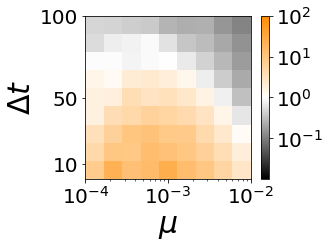

In [56]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []
for tup,val in regime_ratio_test.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
red_brown_colormap = LinearSegmentedColormap.from_list("RedBrown", ["black", "white", "#FF8C01"])

norm_test = LogNorm(vmin=regime_values_test.min(), vmax=regime_values_test.max())
heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))

cbar_test = plt.colorbar(heatmap_test)
cbar_test.set_ticks([1e-1, 1e0, 1e1, 1e2])
cbar_test.set_ticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
#plt.title(r'$R_p$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test.png', bbox_inches='tight')
plt.show()


0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1163/1024686349.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)


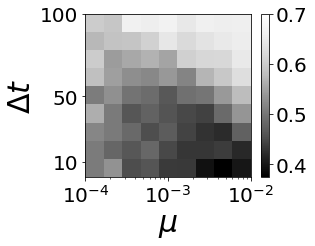

In [210]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []

for tup,val in regime_dist.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
norm_test = Normalize(vmin=regime_values_test.min(), vmax=0.7)

heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_ticks([0.3,0.5,0.7])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
#plt.title(r'$R_p$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test_dist.png', bbox_inches='tight')
plt.show()

In [260]:
with open('../regime_maps/regime_alpha.pkl', 'rb') as f:
    regime_alpha = pickle.load(f)
with open('../regime_maps/regime_fitness.pkl', 'rb') as f:
    regime_fitness= pickle.load(f)
with open('../regime_maps/regime_dist.pkl', 'rb') as f:
    regime_dist = pickle.load(f)
with open('../regime_maps/regime_ratio.pkl', 'rb') as f:
    regime_ratio = pickle.load(f)

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1163/3599577584.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))


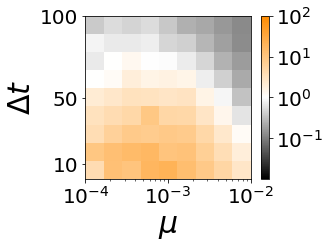

In [247]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []

for tup,val in regime_ratio.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
red_brown_colormap = LinearSegmentedColormap.from_list("RedBrown", ["black", "white", "#FF8C01"])

norm_test = LogNorm(vmin=regime_values_test.min(), vmax=regime_values_test.max())
heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))

cbar_test = plt.colorbar(heatmap_test)
cbar_test.set_ticks([1e-1, 1e0, 1e1, 1e2])
#cbar_test.set_ticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
#plt.title(r'$R_p$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_ratio.png', bbox_inches='tight')
plt.show()

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1163/1387781046.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Blues"), norm=norm_test)


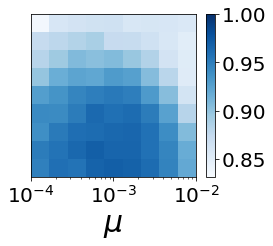

In [251]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []

for tup,val in regime_fitness.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
norm_test = Normalize(vmin=regime_values_test.min(), vmax=1.0)

heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Blues"), norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_ticks([0.3,0.5,0.7])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
#plt.ylabel(r'$\Delta t$', fontsize=30)
plt.yticks([])
plt.xscale('log')
#plt.yticks([10,50,100])
#plt.title(r'$R_p$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_fitness.png', bbox_inches='tight')
plt.show()

In [255]:
corr, p = pearsonr(list(regime_fitness.values()),list(regime_ratio.values()))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.754


In [25]:
with open('../regime_ratio_samplenum_run_5/regime_ratio_samplenum_70.pkl', 'rb') as f:
    regime_ratio_samplenum_70 = pickle.load(f)

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1163/3843247387.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)


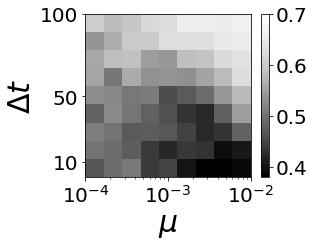

In [262]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []

for tup,val in regime_dist.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
norm_test = Normalize(vmin=regime_values_test.min(), vmax=0.7)

heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_ticks([0.3,0.5,0.7])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
#plt.title(r'$R_p$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_dist.png', bbox_inches='tight')
plt.show()

In [266]:
corr1,p1 = pearsonr(list(regime_dist.values()),list(regime_fitness.values()))
corr2,p2 = pearsonr(list(regime_ratio.values()),list(regime_fitness.values()))
corr3,p3 = pearsonr(list(regime_ratio.values()),list(regime_dist.values()))
corr4,p4 = pearsonr(list(regime_alpha.values()),list(regime_fitness.values()))

print(corr1,p1)
print(corr2,p2)
print(corr3,p3)
print(corr4,p4)

-0.8611571827754632 1.484749240189045e-30
0.7544081864005598 1.280163995734354e-19
-0.6319766227758314 1.774553737064925e-12
-0.5345265458479016 1.0152777417313901e-08


In [213]:
with open("../regime_fitness.pkl", "rb") as f:
    regime_fitness_test = pickle.load(f)

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64
0.8296586545471815


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1163/1348554893.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap="Blues", norm=norm_test)


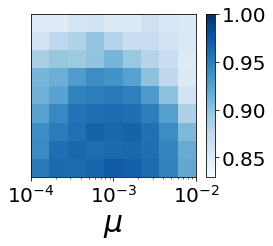

In [217]:
import itertools
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.colors import Normalize


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []
for tup,val in regime_fitness_test.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
print(regime_values_test.min())
norm_test = Normalize(vmin=regime_values_test.min(), vmax=1.0)
heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap="Blues", norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_label(r'$\bar{f}$', fontsize=30)

#cbar_test.set_ticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
#cbar_test.set_label('Ratio')

plt.xlabel(r'$\mu$', fontsize = 30)
#plt.ylabel(r'$\Delta t$', fontsize = 30)
plt.xscale('log')
#plt.yticks([10,50,100])
plt.yticks([])
#plt.title(r'$\bar{f}$', fontsize=30)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test_fit.png', bbox_inches='tight')
plt.show()

In [ ]:
import csv
import numpy as np

# Generate 100 points in logarithmic scale from 0.0001 to 0.01
x_values = np.logspace((0.0001), (0.01), 10)

# Generate 100 points linearly spaced from 1 to 100
y_values = np.linspace(1, 100, 10)

# Generate all possible pairwise combinations
pairs = [(x, y) for x in x_values for y in y_values]

# Write pairs to a CSV file
with open('pairs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['X', 'Y'])  # Write header
    writer.writerows(pairs)
    
print("CSV file created successfully.")

In [35]:
import pickle
with open('../phenopairs.pkl','rb') as f:
    pairs = pickle.load(f)
    print(len(pairs))

190


In [39]:
def hamming_distance(str1, str2):
    if len(str1) != len(str2):
        raise ValueError("Strings must have equal length")
    return sum(ch1 != ch2 for ch1, ch2 in zip(str1, str2))

def calculate_hamming_distance(dataset):
    for tup in dataset:
        str1, str2 = tup
        distance = hamming_distance(str1, str2)
        print(f"Hamming distance between '{str1}' and '{str2}': {distance}")


In [178]:
pairs = np.load('../cc_cs_ss_pairs_seed_1.npy')

In [4]:
relative_areas = defaultdict(float)
relative_areas_hist = defaultdict(list)

[[['((.((...))))' '..(...).....']
  ['.....(...)..' '(.((....))).']
  ['.(.........)' '....(......)']]

 [['.(.((....)))' '(((...)))...']
  ['.....(...)..' '(((....)))..']
  ['(.(.....).).' '(((.....))).']]

 [['..(((....)))' '(((...)))...']
  ['.(((....))).' '(((...)))...']
  ['.(((....))).' '.((......)).']]]


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_2229/2651328060.py:89: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap = axs[i,j].pcolormesh(mu_mesh, gap_mesh,regime_values, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e3, midpoint=1))
/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_2229/2651328060.py:99: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(heatmap, cax=cbar_ax, norm=LogNorm())
/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_2229/2651328060.py:89: MatplotlibDeprecationWarning: shading='flat' when X

    gengap        mu    regime
65    12.0  0.000100  0.875433
34    12.0  0.000167  1.757640
19    12.0  0.000278  2.541977
84    12.0  0.000464  2.552564
30    12.0  0.000774  4.556413
55    12.0  0.001292  9.285313
83    12.0  0.002154  8.804677
48    12.0  0.003594  6.502080
11    12.0  0.005995  3.382398
57    12.0  0.010000  1.545009


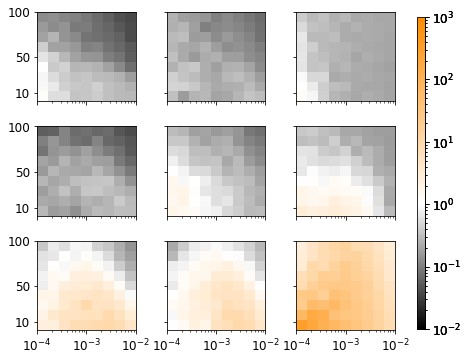

In [108]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.gridspec as gridspec
from collections import defaultdict

class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    
relative_areas = defaultdict(float)
relative_areas_hist =   defaultdict(list)
seed = 10
path = "../regime_ratio_seed_"+str(seed)

print(pairs)

fig, axs = plt.subplots(3, 3, figsize=(5.8, 5.1), sharey=True, sharex = True)

plt.rcParams.update({'font.size':12})
fig.tight_layout(pad = 1.0)

for i in range(3):
    for j in range(3):
        
        run = i * 3 + j
        with open(path + "/regime_ratio_"+str(run)+".pkl","rb") as f:
            regime_ratio = pickle.load(f)
        regime_values = []
        mu_values = []
        gengap_values = []  
        for tup,val in zip(regime_ratio.keys(), regime_ratio.values()):
            #print(tup,val)
            #if run == 7 and tup[1]==50: print(tup[0],tup[1],val)
            regime_values.append(val)
            mu_values.append(tup[0])
            gengap_values.append(tup[1])
       
        df = pd.DataFrame({
            'gengap': gengap_values,
            'mu': mu_values,
            'regime': regime_values})

        df = df.sort_values(by=['gengap','mu'])
        if run ==7: print(df[df['gengap'] == 12])
        unique_mu_values = np.unique(mu_values)
        unique_gap_values = np.unique(gengap_values)
        mu_mesh, gap_mesh = np.meshgrid(unique_mu_values, unique_gap_values)

        regime_values = df['regime'].values.reshape(len(unique_gap_values), len(unique_mu_values))
        mask = regime_values > 1
        count = np.sum(mask)
        total = np.prod(regime_values.shape)

        red_brown_colormap = LinearSegmentedColormap.from_list("RedBrown", ["black", "white", "#FF8C01"])

        heatmap = axs[i,j].pcolormesh(mu_mesh, gap_mesh,regime_values, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e3, midpoint=1))

        #print(flattened_list[run][0] + ' - ' + flattened_list[run][1] + ' :' + str(hammingdist))
        axs[i,j].set_xscale('log')
        if (i == 0 or i==1 or i==2) and j==0:
           #axs[i,j].set_ylabel(r'$\Delta t$', size = 30)
           axs[i,j].set_yticks([10.,50.,100.])
        #if i==2 and (j == 0 or j==1 or j==2):
        #    axs[i,j].set_xlabel(r'$\mu$', size = 30)
    cbar_ax = fig.add_axes([1.0, 0.09, 0.02, 0.85])
    fig.colorbar(heatmap, cax=cbar_ax, norm=LogNorm())

# Assuming `heatmap` is your heatmap data

plt.show()
fig.savefig("../regimesweep_"+ str(seed) + ".png", bbox_inches='tight')

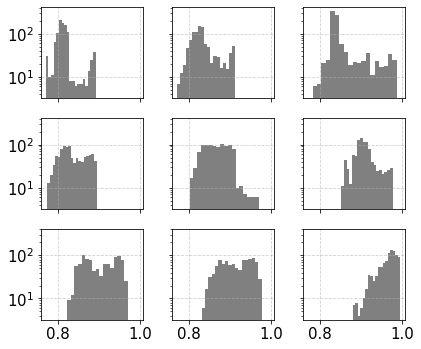

In [346]:
import matplotlib.pyplot as plt
import itertools
import pickle
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(3, 3, figsize=(6.1, 5.1), sharey=True, sharex=True)

plt.rcParams.update({'font.size': 15})
fig.tight_layout(pad=1.0)
all_regime_values_list = []
mu_list = []
gap_list = []

class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self, vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint = midpoint

    def __call__(self, value, clip=None):
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))

for run in range(9):
    all_regime_values = []

    for seed in [1, 3, 5, 6, 7, 8, 9, 10, 11, 12]:
        path = f"../regime_fitness_seed_{seed}"
        pairs = np.load(f"../regime_ratio_seed_{seed}(1)/cc_cs_ss_pairs_seed_{seed}.npy")

        with open(f"{path}/regime_fitness_{run}.pkl", "rb") as f:
            regime_ratio = pickle.load(f)

        for tup, val in regime_ratio.items():
            all_regime_values.append(val)
            all_regime_values_list.append(val)
            mu_list.append(tup[0])
            gap_list.append(tup[1])

    min_val, max_val = min(all_regime_values), max(all_regime_values)
    #bin_edges = np.logspace(np.log10(min_val + 1e-10), np.log10(max_val), num=20)
    bin_edges = np.linspace(min_val, max_val, num=20)

    row, col = divmod(run, 3)
    axs[row, col].hist(all_regime_values, bins=bin_edges, color='grey', log=True)
    #axs[row, col].set_xscale('log')
    axs[row, col].grid(True, linestyle='--', alpha=0.6)
    #axs[row, col].axvline(x=1, color='black', linestyle='--', linewidth=2)
    #axs[row, col].set_xlim([1e-3, 1e3])
    #axs[row, col].set_ylim([1, 1e3])
    #axs[row, col].set_yticks([1e1, 1e2])
    #log_xmin, log_xmax = np.log10(axs[row, col].get_xlim())
    #log_1_position = (np.log10(1) - log_xmin) / (log_xmax - log_xmin)

plt.savefig('../histo_fitness.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [150]:
with open("../phenopairs.pkl","rb") as f:
    pairs = pickle.load(f)

In [151]:
pairs[130]

('.((....))...', '...(((...)))')

# 10 batches to prove $\Delta t \rightarrow 0$ gives $R_p \rightarrow \inf$
 

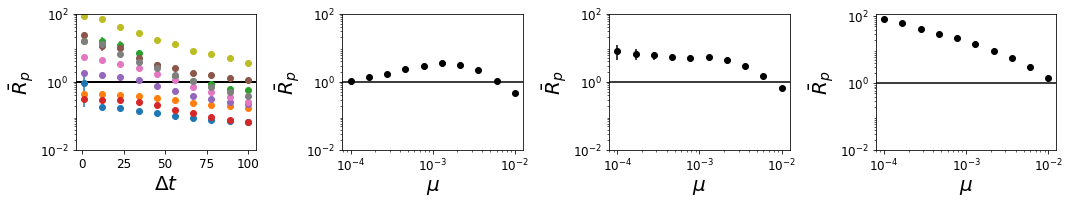

In [93]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import defaultdict

# Initialize the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(15,3))
axes = axes.flatten()
fig.tight_layout(pad=1.5)

# Plot for regime_ratio and regime_fitness for runs 6 to 8 (last three subplots)
for run in range(9):
	# Plot for regime_ratio
	R_p_gapdict = defaultdict(list)
	for seed in [1, 3, 5, 6, 7, 8, 9, 10, 11, 12]:
		path = f"../regime_ratio_seed_{seed}"
		with open(f"{path}/regime_ratio_{run}.pkl", "rb") as f:
			regime_ratio = pickle.load(f)
   
		for tup, val in regime_ratio.items():
			R_p_gapdict[tup[1]].append(val)
	
	R_p_gap_mean = []
	R_p_gap_std = []
	gaps = []
	for gap, val in sorted(R_p_gapdict.items()):
		gaps.append(gap)
		R_p_gap_mean.append(np.mean(val))
		R_p_gap_std.append(np.std(val)/np.sqrt(len(val)))
	
	axes[0].errorbar(gaps, R_p_gap_mean, yerr=R_p_gap_std, fmt='o', label=f'Regime Ratio Run {run}')
	axes[0].set_yscale('log')
	axes[0].set_ylabel(r'$\bar{R}_p$', fontsize=20)
	axes[0].set_xlabel(r'$\Delta t$', fontsize=20)
	axes[0].axhline(y=1, color='k', linestyle='-')
	axes[0].set_yticks([1e-2, 1e0, 1e2])
	axes[0].set_ylim([1e-2, 1e2])
for i, run in enumerate(range(6, 9)):
	ax = axes[i+1]
	
	# Plot for regime_ratio
	R_p_gapdict = defaultdict(list)
	for seed in [1, 3, 5, 6, 7, 8, 9, 10, 11, 12]:
		path = f"../regime_ratio_seed_{seed}"
		with open(f"{path}/regime_ratio_{run}.pkl", "rb") as f:
			regime_ratio = pickle.load(f)
   
		for tup, val in regime_ratio.items():
			R_p_gapdict[tup[0]].append(val)
	
	R_p_gap_mean = []
	R_p_gap_std = []
	gaps = []
	for gap, val in sorted(R_p_gapdict.items()):
		gaps.append(gap)
		R_p_gap_mean.append(np.mean(val))
		R_p_gap_std.append(np.std(val) / np.sqrt(len(val)))
	
	ax.errorbar(gaps, R_p_gap_mean, yerr=R_p_gap_std, fmt='o', color='k', label='Regime Ratio')
	
	# ax.errorbar(gaps, R_f_gap_mean, yerr=R_f_gap_std, fmt='o', label='Regime Fitness')
	
	ax.set_yscale('log')
	# ax.set_title(f'Run {run}')
	ax.set_xlabel(r'$\mu$', fontsize=20)
	ax.set_xscale('log')
	ax.set_ylabel(r'$\bar{R}_p$', fontsize=20)
	ax.set_yticks([1e-2, 1e0, 1e2])
	ax.axhline(y=1, color='k', linestyle='-')

plt.savefig('../regime_ratio_meangap.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_20.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_70.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_100.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_1000.pkl does not exist. Skipping.


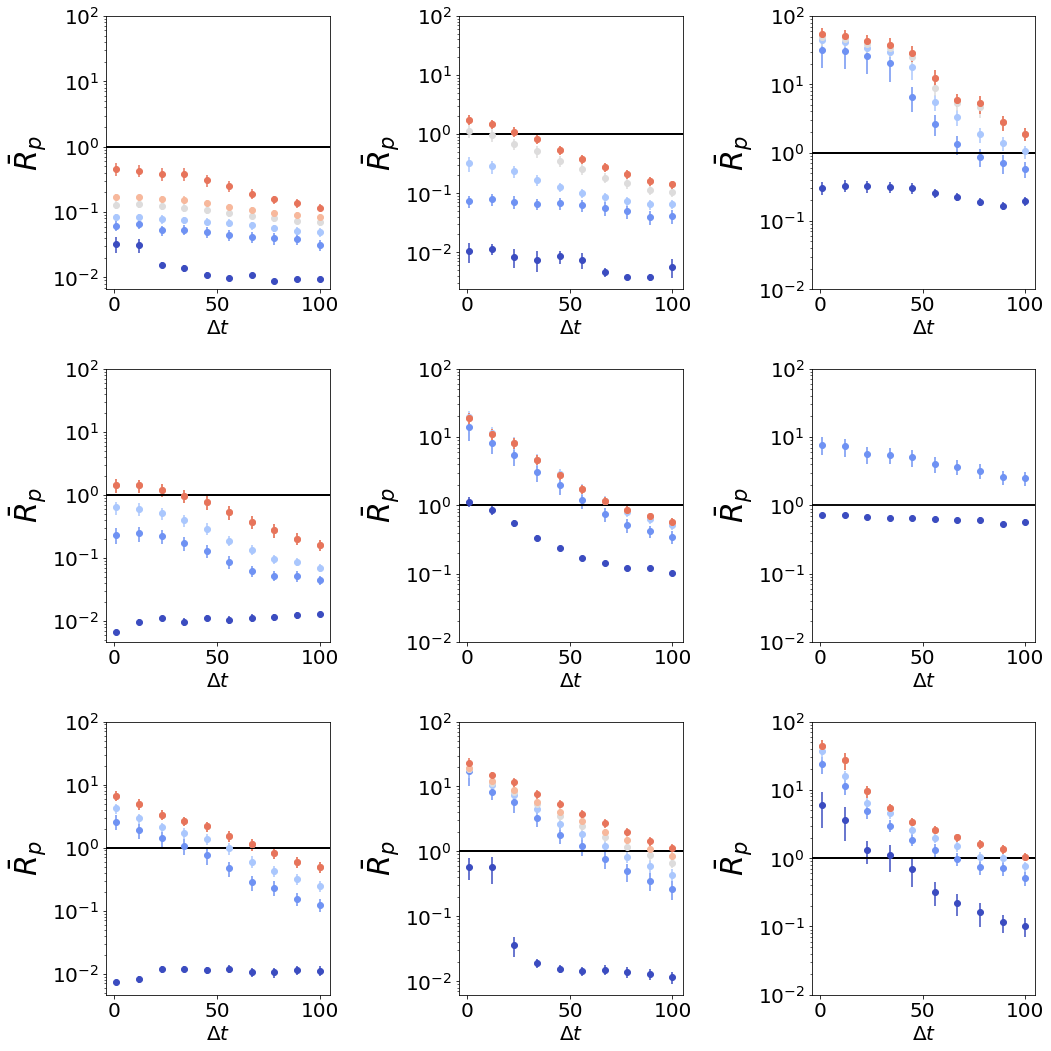

In [72]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import defaultdict
from matplotlib.cm import get_cmap
import os
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=2.5)
cmap = get_cmap('coolwarm')
samples = [1, 10, 20, 70, 100, 1000]
colors = [cmap(i / len(samples)) for i in range(len(samples))]

# Iterate over each run
for run in range(0, 9):
    R_p_gapdict = defaultdict(list)
    for idx, sample in enumerate(samples):
        file_path = f"../regime_ratio_samplenum_run_{run}/regime_ratio_samplenum_{sample}.pkl"
        if not os.path.exists(file_path):
            print(f"File {file_path} does not exist. Skipping.")
            continue
        with open(f"../regime_ratio_samplenum_run_{run}/regime_ratio_samplenum_{sample}.pkl", "rb") as f:
            regime_ratio = pickle.load(f)
        for tup, val in regime_ratio.items():
            R_p_gapdict[tup[1]].append(val)
        R_p_gap_mean = []
        R_p_gap_std = []
        gaps = []
        for gap, val in sorted(R_p_gapdict.items()):
            gaps.append(gap)
            R_p_gap_mean.append(np.mean(val))
            R_p_gap_std.append(np.std(val) / np.sqrt(len(val)))

        # Determine the subplot location
        ax = axes[run // 3, run % 3]
        ax.errorbar(gaps, R_p_gap_mean, yerr=R_p_gap_std, fmt='o', label=r'$N_s=$ ' + str(sample),color=colors[idx])
        #ax.set_title(f'Run {run}')
        ax.set_xlabel(r'$\Delta t$')
        ax.set_ylabel('Mean Regime Ratio')
        ax.set_yscale('log')
      
        ax.set_yticks([1e-2, 1e-1, 1e0, 1e1, 1e2])
        ax.set_ylabel(r'$\bar{R}_p$', fontsize=30)
        ax.axhline(y=1, color='k', linestyle='-')
        #ax.legend(fontsize=15)
        #ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('regime_plots_9_runs_deltat.png', bbox_inches='tight')
plt.show()

File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_20.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_70.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_100.pkl does not exist. Skipping.
File ../regime_ratio_samplenum_run_5/regime_ratio_samplenum_1000.pkl does not exist. Skipping.


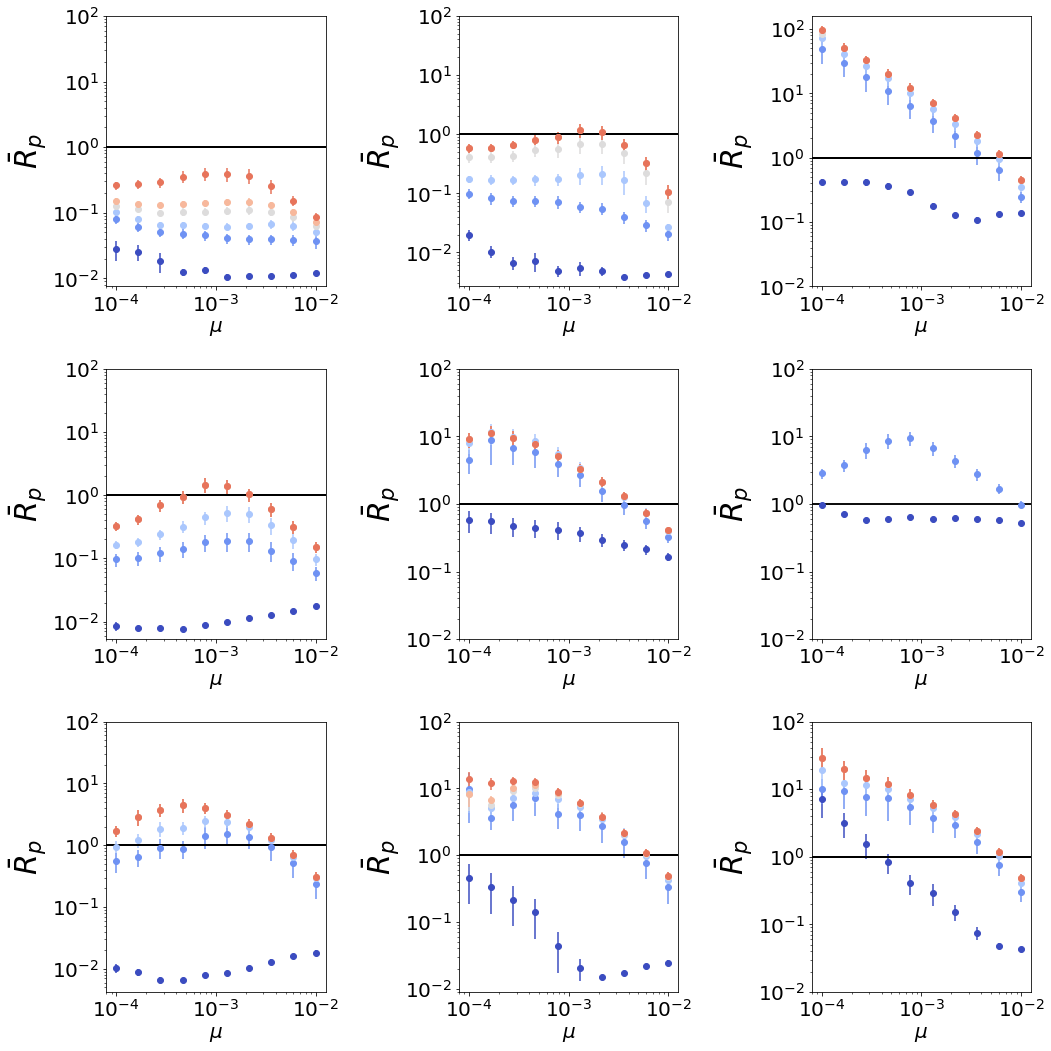

In [73]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import defaultdict
from matplotlib.cm import get_cmap
import os
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=2.5)
cmap = get_cmap('coolwarm')
samples = [1, 10, 20, 70, 100, 1000]
colors = [cmap(i / len(samples)) for i in range(len(samples))]

# Iterate over each run
for run in range(0, 9):
    R_p_gapdict = defaultdict(list)
    for idx, sample in enumerate(samples):
        file_path = f"../regime_ratio_samplenum_run_{run}/regime_ratio_samplenum_{sample}.pkl"
        if not os.path.exists(file_path):
            print(f"File {file_path} does not exist. Skipping.")
            continue
        with open(f"../regime_ratio_samplenum_run_{run}/regime_ratio_samplenum_{sample}.pkl", "rb") as f:
            regime_ratio = pickle.load(f)
        for tup, val in regime_ratio.items():
            R_p_gapdict[tup[0]].append(val)
        R_p_gap_mean = []
        R_p_gap_std = []
        gaps = []
        for gap, val in sorted(R_p_gapdict.items()):
            gaps.append(gap)
            R_p_gap_mean.append(np.mean(val))
            R_p_gap_std.append(np.std(val) / np.sqrt(len(val)))

        # Determine the subplot location
        ax = axes[run // 3, run % 3]
        ax.errorbar(gaps, R_p_gap_mean, yerr=R_p_gap_std, fmt='o', label=r'$N_s=$ ' + str(sample),color=colors[idx])
        #ax.set_title(f'Run {run}')
        ax.set_xlabel(r'$\mu$')
        ax.set_ylabel('Mean Regime Ratio')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_yticks([1e-2, 1e-1, 1e0, 1e1, 1e2])
        ax.set_ylabel(r'$\bar{R}_p$', fontsize=30)
        ax.axhline(y=1, color='k', linestyle='-')
        #ax.legend(fontsize=15)
        #ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('regime_plots_9_runs_mu.png', bbox_inches='tight')
plt.show()

# Mean fitness

In [13]:
import pickle
with open("../regime_maps_plasticoption/regime_ratio.pkl","rb") as f:
    regime_ratio = pickle.load(f)
with open("../regime_maps_plasticoption/regime_fitness.pkl","rb") as f:
    regime_fitness = pickle.load(f)
with open("../regime_maps_plasticoption/regime_dist.pkl","rb") as f:
    regime_dist = pickle.load(f)

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64
0.0540831290854022


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1042/4163499575.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))


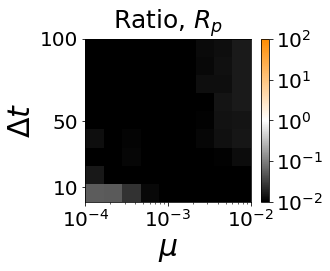

In [48]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []
for tup,val in regime_ratio.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
red_brown_colormap = LinearSegmentedColormap.from_list("RedBrown", ["black", "white", "#FF8C01"])

norm_test = LogNorm(vmin=regime_values_test.min(), vmax=regime_values_test.max())
print(regime_values_test.max())
heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=red_brown_colormap, norm=MidPointLogNorm(vmin=1e-2, vmax=1e2, midpoint=1))

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_ticks([1e-1, 1e0, 1e1, 1e2])
#cbar_test.set_ticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
plt.title(r'Ratio, $R_p$', fontsize=25)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test.png', bbox_inches='tight')
plt.show()

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64
0.5786675148319249


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1042/2764459111.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap="Blues", norm=norm_test)


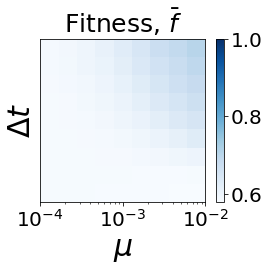

In [45]:
import itertools
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.colors import Normalize


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []
for tup,val in regime_fitness.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
print(regime_values_test.min())
norm_test = Normalize(vmin=regime_values_test.min(), vmax=1.0)
heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap="Blues", norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_label(r'$\bar{f}$', fontsize=30)

#cbar_test.set_ticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
#cbar_test.set_label('Ratio')

plt.xlabel(r'$\mu$', fontsize = 30)
plt.ylabel(r'$\Delta t$', fontsize = 30)
plt.xscale('log')
#plt.yticks([10,50,100])
plt.yticks([])
plt.title(r'Fitness, $\bar{f}$', fontsize=25)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test_fit.png', bbox_inches='tight')
plt.show()

0     0.000100
10    0.000167
20    0.000278
30    0.000464
40    0.000774
        ...   
59    0.001292
69    0.002154
79    0.003594
89    0.005995
99    0.010000
Name: mu, Length: 100, dtype: float64


/var/folders/z7/hgh7h51d2yz9fyznfmp8564h0000gn/T/ipykernel_1042/2920011823.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)


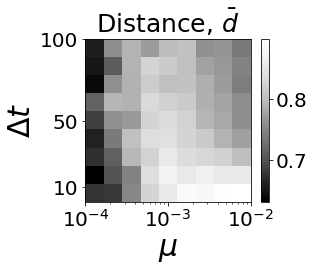

In [46]:
import itertools
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt


class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))
    

# Set the default font size
plt.rcParams['font.size'] = 20
# Assuming you have the regime[(mu,gap)] values stored in a numpy array called 'regime_values'
# and the corresponding mu and gap values stored in separate numpy arrays called 'mu_values' and 'gap_values'
regime_values_test = []
gengap_values_test = []
mu_values_test = []

for tup,val in regime_dist.items():
    mu_values_test.append(tup[0])
    gengap_values_test.append(tup[1])
    regime_values_test.append(val)


df = pd.DataFrame({
		
		'gengap': gengap_values_test,
		'mu': mu_values_test,
		'regime': regime_values_test
	})

	# Sort the DataFrame by 'mu' and 'gengap'
df = df.sort_values(by=['gengap','mu'])
print(df['mu'])
unique_mu_values_test = np.unique(mu_values_test)
unique_gap_values_test = np.unique(gengap_values_test)
mu_mesh_test, gap_mesh_test = np.meshgrid(unique_mu_values_test, unique_gap_values_test)
regime_values_test = df['regime'].values.reshape(len(unique_gap_values_test), len(unique_mu_values_test))
regime_values_test = np.array(regime_values_test)
regime_values_test = regime_values_test.reshape(len(unique_gap_values_test), len(unique_mu_values_test))

plt.figure(figsize=(3.7, 3))

# Use LogNorm for the color scale
norm_test = Normalize(vmin=regime_values_test.min())

heatmap_test = plt.pcolormesh(mu_mesh_test, gap_mesh_test, regime_values_test, cmap=plt.get_cmap("Greys_r"), norm=norm_test)

cbar_test = plt.colorbar(heatmap_test)
#cbar_test.set_ticks([0.3,0.5,0.7])
#cbar_test.set_label(r'$R_p$', fontsize=30)

plt.xlabel(r'$\mu$',fontsize=30)
plt.ylabel(r'$\Delta t$', fontsize=30)
plt.xscale('log')
plt.yticks([10,50,100])
plt.title(r'Distance, $\bar{d}$', fontsize=25)
#plt.title(phenopairs[130][0] + '-' + phenopairs[130][1] + ' :' + str(np.round(hamming_distance(phenopairs[130][0],phenopairs[130][1])/12.,2)), size = 20)
plt.savefig('regime_test_dist.png', bbox_inches='tight')
plt.show()